# Twitch Data

Esta base de dados está disponível em: https://www.kaggle.com/aayushmishra1512/twitchdata

## Dicionário

- **Channel**: nome do canal na twitch;
- **Watch time(Minutes)**: Tempo, em minutos, que o canal foi assitido;
- **Stream time(minutes)**: Tempo, em minutos, que o canal esteve ao vivo;
- **Peak viewers**: Maior pico de visualizações simultâneas do canal;
- **Average viewers**: Média de expectadores do canal;
- **Followers**: Número de seguidores do canal;
- **Followers gained**: Número de seguidores que o canal ganhou no último ano;
- **Views gained**: Número de visualizações do canal no último ano;
- **Partnered**: Diz se o canal é parceiro ou não da Twitch.
- **Mature**: Diz se o conteúdo possui conteúdo para +18
- **Language**: Idioma do canal.

In [83]:
# fazendo as importações

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

In [5]:
# importando a base de dados

df = pd.read_csv('../data/twitchdata.csv')
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


## 1. Observação dos dados

como o dataset não há dados nulos, não iremos fazer o tratamento de dados nulos. Podemos observar que há 11 colunas, sendo duas delas sendo object, duas booleanas e as sete restantes são inteiros.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


<function matplotlib.pyplot.show(close=None, block=None)>

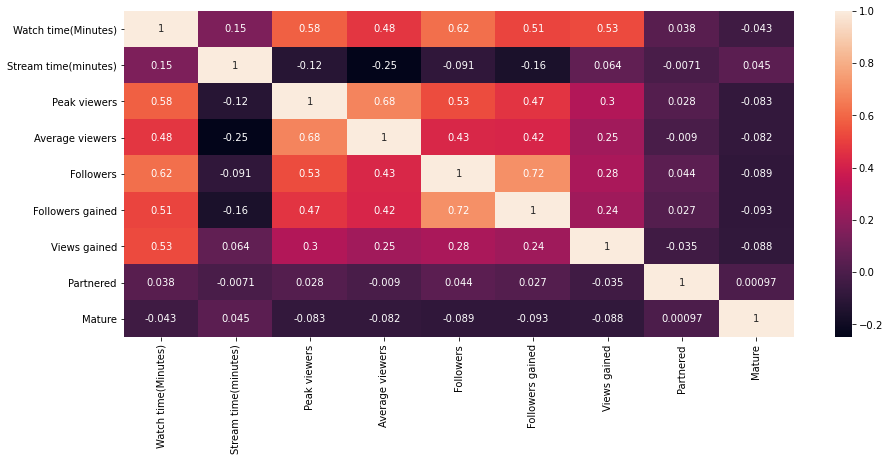

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot = True)
plt.show

## 2. Análises individuais

### 2.1 Gráficos

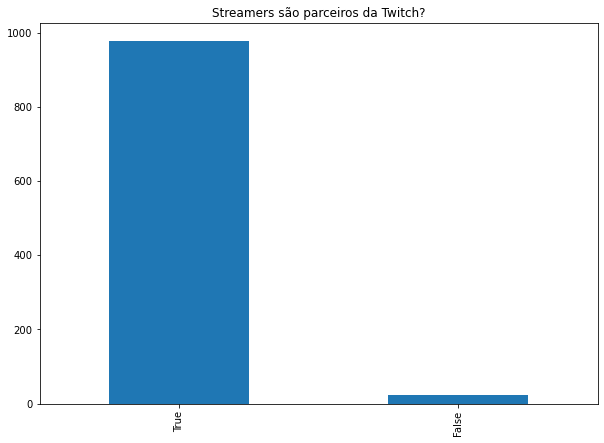

In [23]:
fig = plt.figure(figsize =(10, 7))
fig = df['Partnered'].value_counts().plot.bar()
fig.set_title('Streamers são parceiros da Twitch?')
plt.show()

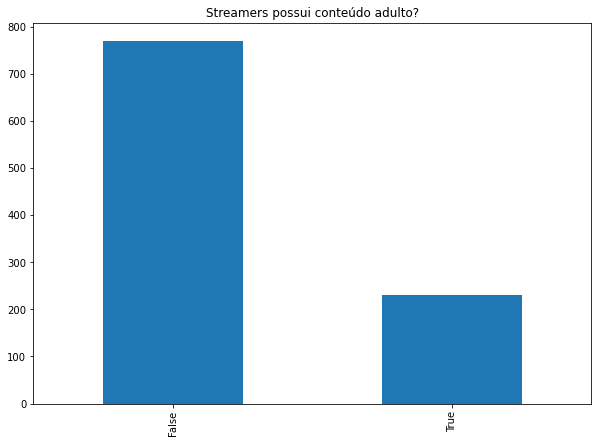

In [21]:
fig = plt.figure(figsize =(10, 7))
fig = df['Mature'].value_counts().plot.bar()
fig.set_title('Streamers possui conteúdo adulto?')
plt.show()

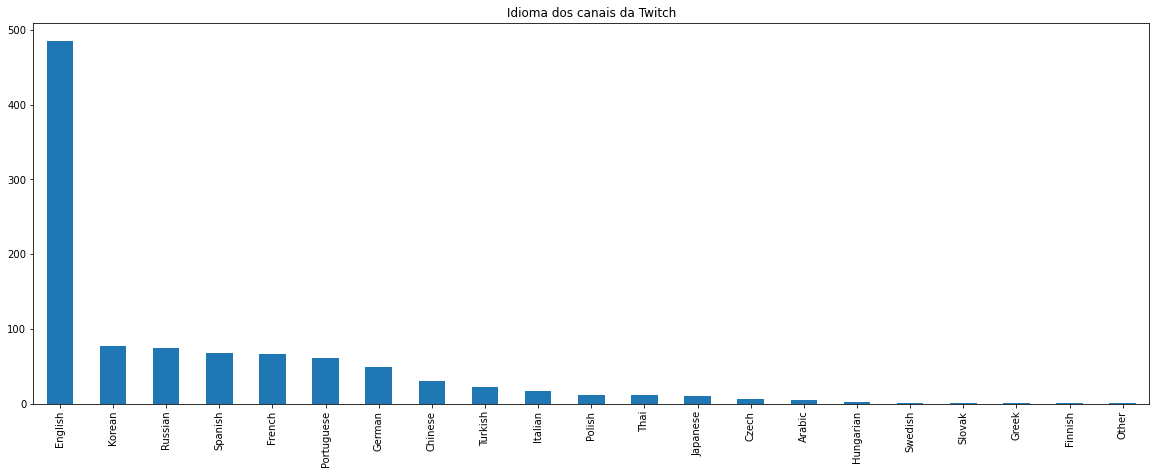

In [19]:
fig = plt.figure(figsize =(20, 7))
fig = df['Language'].value_counts().plot.bar()
fig.set_title('Idioma dos canais da Twitch')
plt.show()

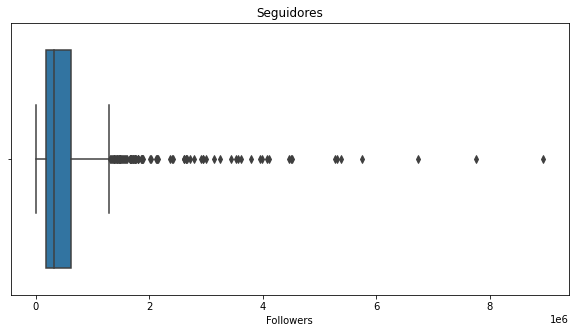

In [38]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(data = df, x = 'Followers', orient = 'h')
fig.set_title("Seguidores")
plt.show()

# 3. Utilizando os primeiros 100 streamers

In [51]:
df100 = df.head(100) 

In [52]:
df100.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),100.0,1.668326e+09,1.023282e+09,864157695.0,1.070361e+09,1.334861e+09,1.770979e+09,6.196162e+09
Stream time(minutes),100.0,1.404417e+05,1.032141e+05,6315.0,8.285250e+04,1.228050e+05,1.551075e+05,5.177400e+05
Peak viewers,100.0,1.306919e+05,1.228575e+05,16289.0,4.299725e+04,9.004150e+04,1.753285e+05,6.393750e+05
Average viewers,100.0,1.628944e+04,1.704607e+04,2635.0,7.617250e+03,1.086300e+04,2.115475e+04,1.476430e+05
Followers,100.0,1.850977e+06,1.735346e+06,299048.0,6.157248e+05,1.189383e+06,2.615777e+06,8.938903e+06
Followers gained,100.0,6.499019e+05,7.688163e+05,57681.0,1.367925e+05,3.751655e+05,8.282215e+05,3.966525e+06
Views gained,100.0,4.135840e+07,6.654700e+07,6781403.0,2.048707e+07,3.061580e+07,4.452838e+07,6.701375e+08


<function matplotlib.pyplot.show(close=None, block=None)>

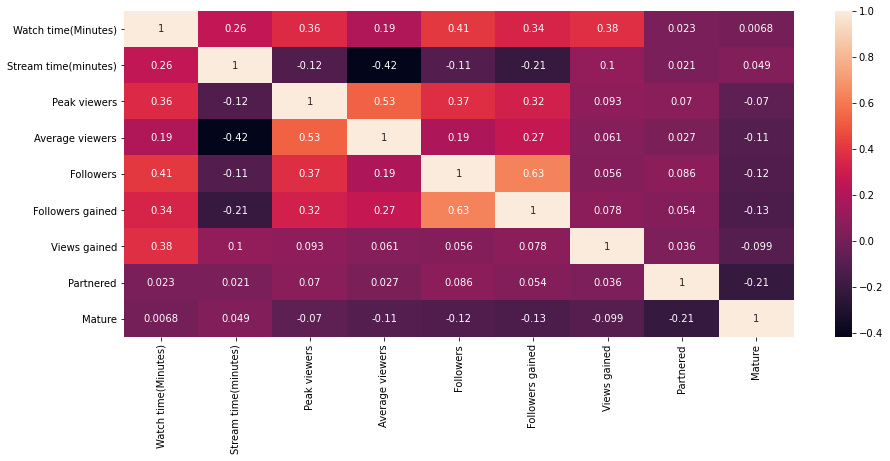

In [53]:
plt.figure(figsize=(15,6))
sns.heatmap(df100.corr(),annot = True)
plt.show

## 3.1 Análises individuais

In [74]:
maxs = df100['Watch time(Minutes)'].max()
df100.loc[df100['Watch time(Minutes)'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


In [66]:
maxs = df100['Stream time(minutes)'].max()
df100.loc[df100['Stream time(minutes)'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English


In [68]:
maxs = df100['Peak viewers'].max()
df100.loc[df100['Peak viewers'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English


In [69]:
maxs = df100['Average viewers'].max()
df100.loc[df100['Average viewers'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English


In [70]:
maxs = df100['Followers'].max()
df100.loc[df100['Followers'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [71]:
maxs = df100['Followers gained'].max()
df100.loc[df100['Followers gained'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish


In [72]:
maxs = df100['Views gained'].max()
df100.loc[df100['Views gained'] == maxs]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English


### 3.1.1 Gráficos

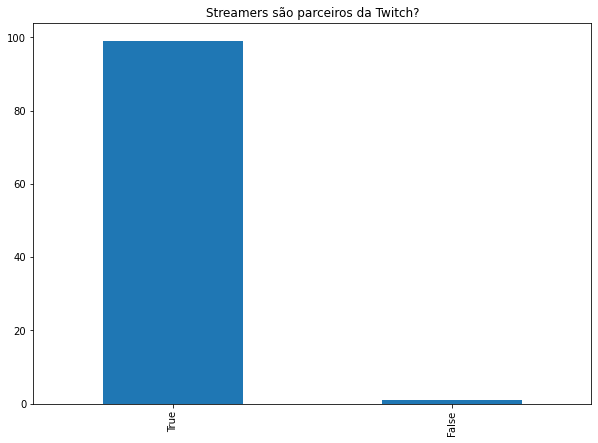

In [54]:
fig = plt.figure(figsize =(10, 7))
fig = df100['Partnered'].value_counts().plot.bar()
fig.set_title('Streamers são parceiros da Twitch?')
plt.show()

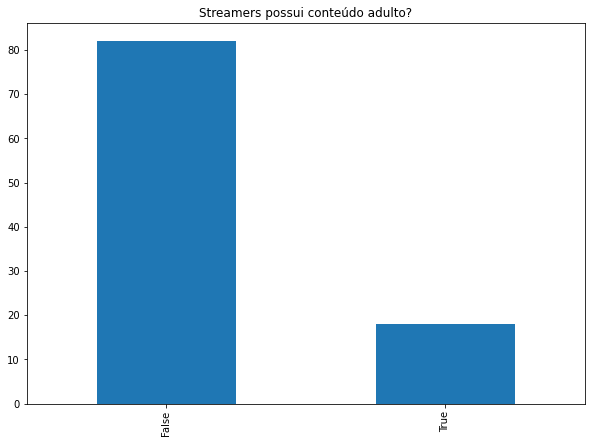

In [55]:
fig = plt.figure(figsize =(10, 7))
fig = df100['Mature'].value_counts().plot.bar()
fig.set_title('Streamers possui conteúdo adulto?')
plt.show()

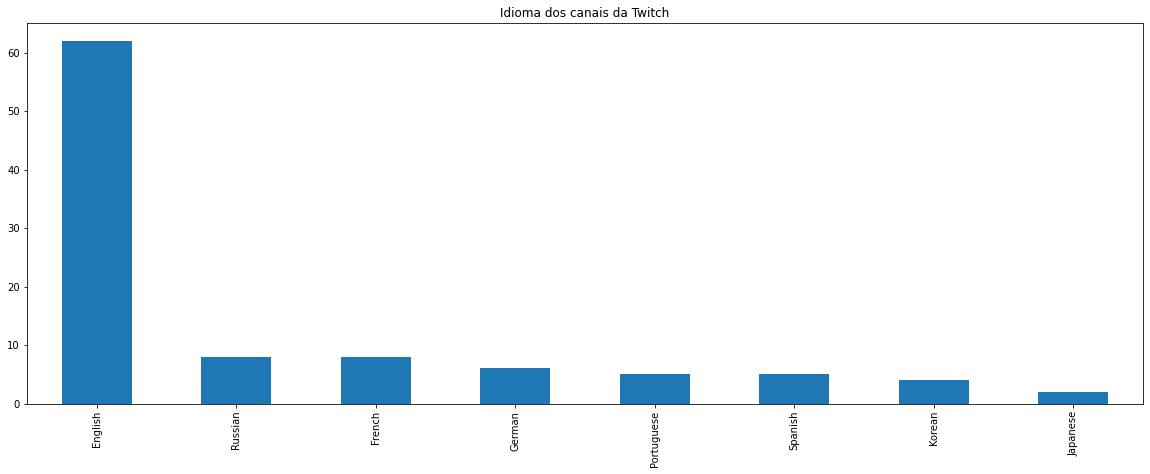

In [56]:
fig = plt.figure(figsize =(20, 7))
fig = df100['Language'].value_counts().plot.bar()
fig.set_title('Idioma dos canais da Twitch')
plt.show()

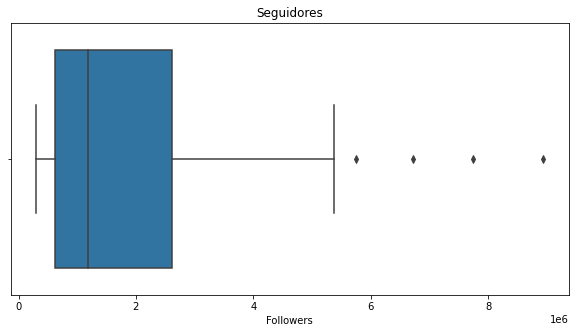

In [57]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(data = df100, x = 'Followers', orient = 'h')
fig.set_title("Seguidores")
plt.show()

## 3.2 Análises em duas variáveis

C:\Users\Isabella\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Isabella\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Isabella\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Isabella\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Isabella\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Isabella\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missi

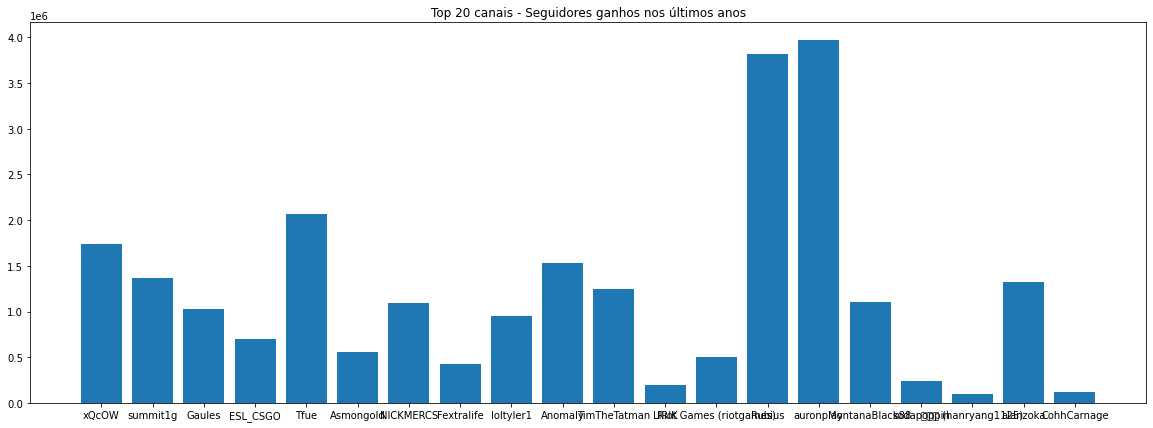

In [66]:
top20 = df.head(20)

fig = plt.figure(figsize =(20, 7))
plt.bar(top20['Channel'],top20['Followers gained'])
plt.title("Top 20 canais - Seguidores ganhos nos últimos anos")
plt.show()

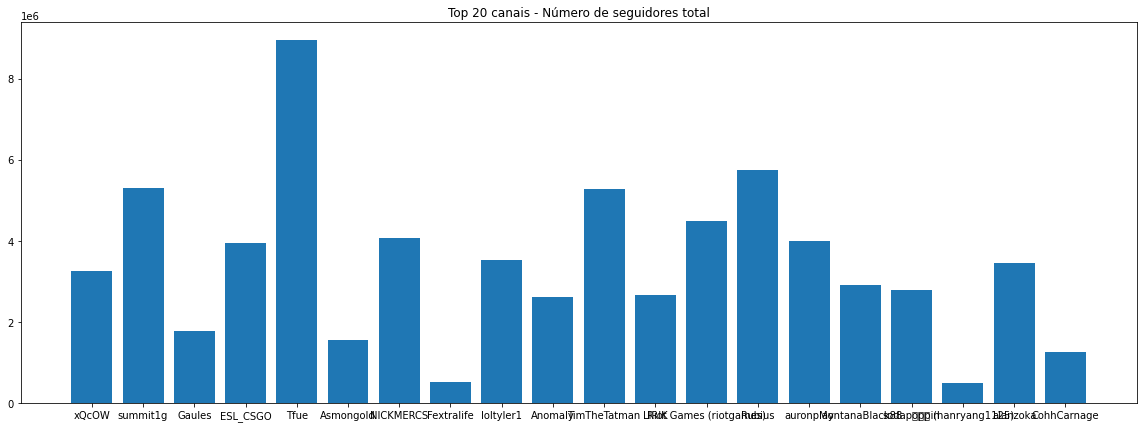

In [42]:
fig = plt.figure(figsize =(20, 7))
plt.bar(top20['Channel'],top20['Followers'])
plt.title("Top 20 canais - Número de seguidores total")
plt.show()

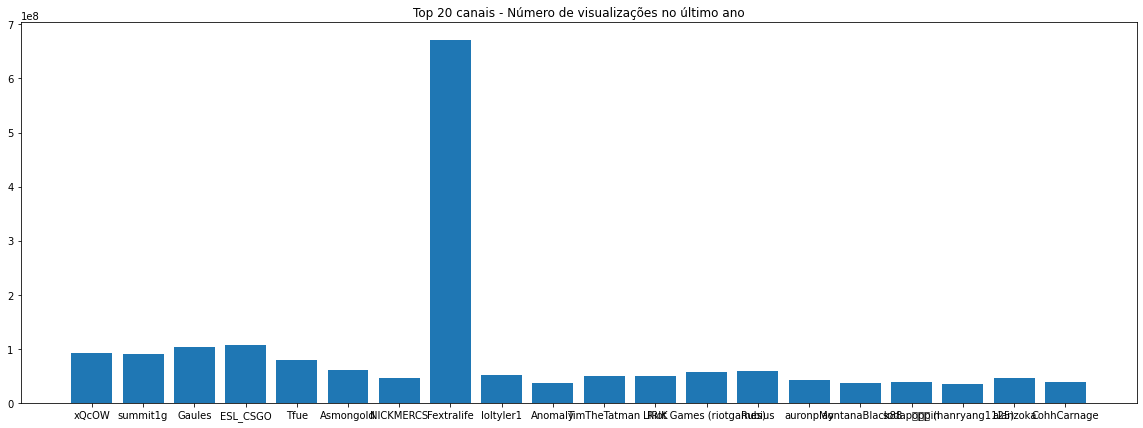

In [43]:
fig = plt.figure(figsize =(20, 7))
plt.bar(top20['Channel'],top20['Views gained'])
plt.title("Top 20 canais - Número de visualizações no último ano")
plt.show()

# 4 Streamers brasileiros

In [96]:
df_br = df[df['Language'] == 'Portuguese']
df_br

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
18,alanzoka,2055003870,103770,89153,19560,3445134,1325075,46515698,True,False,Portuguese
26,YoDa,1690237110,135675,123796,12868,1792625,383130,38499423,True,False,Portuguese
58,RiotGamesBrazil,1228613130,38370,255542,25918,1011924,325801,33796768,True,False,Portuguese
97,NOBRU,888211260,38655,132224,22070,1549722,1400039,6781403,True,False,Portuguese
...,...,...,...,...,...,...,...,...,...,...,...
959,Gabi,126779310,63480,17866,2174,271202,178648,3821231,True,False,Portuguese
971,Buozzi,124926540,142785,4036,872,75290,39547,5126434,True,True,Portuguese
977,Patriota,124595820,64305,29435,1951,646758,344213,3707623,True,False,Portuguese
979,zorlaKOKA,124241010,100050,4977,1247,361102,83418,7654224,True,False,Portuguese


<function matplotlib.pyplot.show(close=None, block=None)>

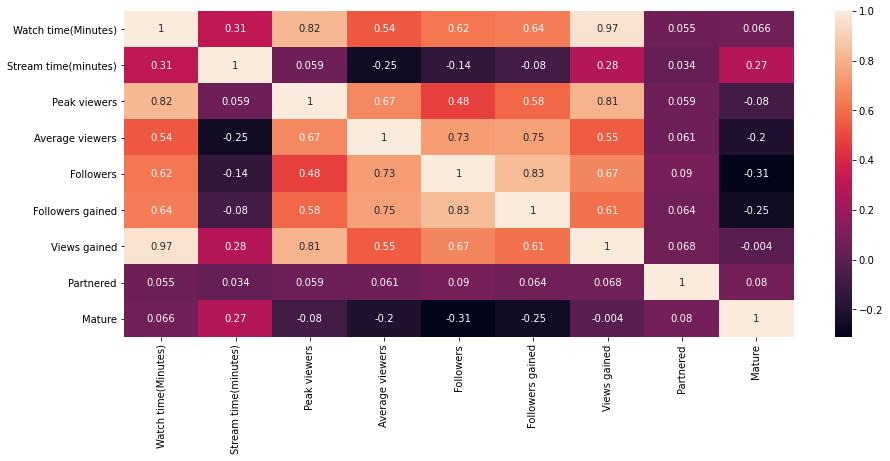

In [104]:
plt.figure(figsize=(15,6))
sns.heatmap(df_br.corr(),annot = True)
plt.show

In [49]:
df_br.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),61.0,4.524883e+08,7.664084e+08,124180125.0,160672260.0,246712590.0,407188275.0,5.644591e+09
Stream time(minutes),61.0,1.584969e+05,1.274427e+05,29625.0,85545.0,107055.0,155595.0,5.152800e+05
Peak viewers,61.0,3.846348e+04,6.428534e+04,2445.0,7940.0,15242.0,36519.0,3.873150e+05
Average viewers,61.0,3.800934e+03,5.035633e+03,315.0,1196.0,1914.0,4111.0,2.591800e+04
Followers,61.0,5.558683e+05,5.753008e+05,70814.0,203549.0,327645.0,767187.0,3.445134e+06
Followers gained,61.0,2.471656e+05,2.643657e+05,21318.0,91352.0,188163.0,284169.0,1.400039e+06
Views gained,61.0,1.086869e+07,1.474013e+07,1772816.0,3786059.0,6781403.0,10940319.0,1.026116e+08


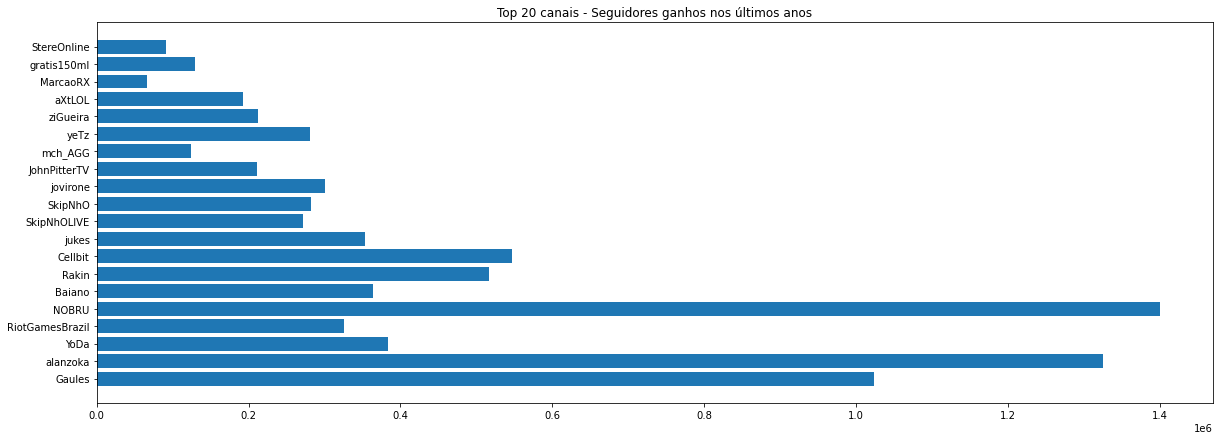

In [64]:
fig = plt.figure(figsize =(20, 7))
plt.barh(df_br['Channel'].head(20),df_br['Followers gained'].head(20))
plt.title("Top 20 canais - Seguidores ganhos nos últimos anos")
plt.show()

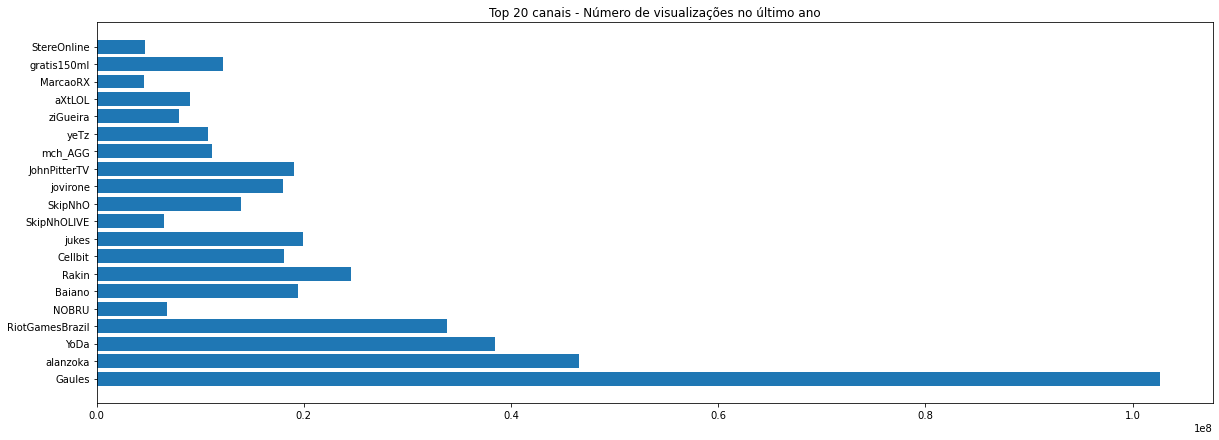

In [62]:
fig = plt.figure(figsize =(20, 7))
plt.barh(df_br['Channel'].head(20),df_br['Views gained'].head(20))
plt.title("Top 20 canais - Número de visualizações no último ano")
plt.show()

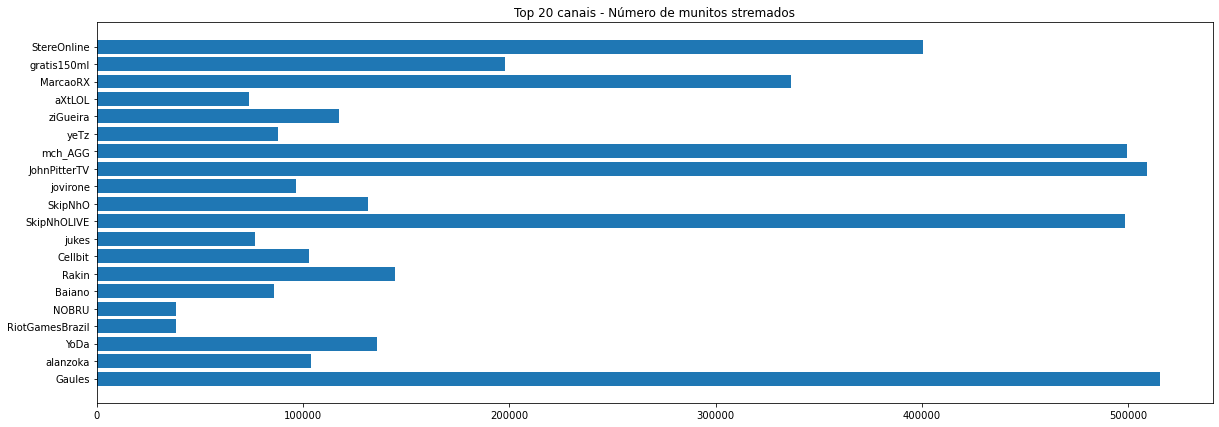

In [67]:
fig = plt.figure(figsize =(20, 7))
plt.barh(df_br['Channel'].head(20),df_br['Stream time(minutes)'].head(20))
plt.title("Top 20 canais - Número de munitos stremados")
plt.show()

# Regressão Linear

- Qual a relação das outras variáveis com o ganho de seguidores do streamer no último ano?

In [75]:
df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [76]:
variavel_preditora = ['Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers','Views gained']
variavel_alvo = ['Followers gained']

X: Watch time(Minutes)
Score: 0.26486211567757334
Coef: [[0.00031828]]
Intercept [72342.98769683]


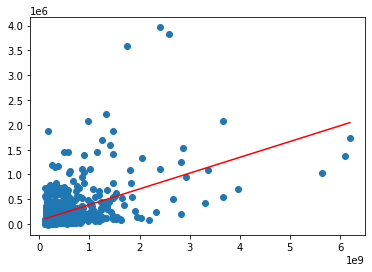

X: Stream time(minutes)
Score: 0.025016099299540184
Coef: [[-0.62971154]]
Intercept [281408.32125095]


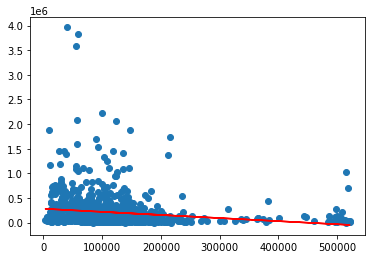

X: Peak viewers
Score: 0.22129000305603108
Coef: [[2.65111908]]
Intercept [107254.67001335]


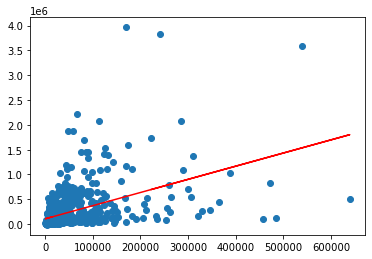

X: Average viewers
Score: 0.17648179569287115
Coef: [[16.8916698]]
Intercept [124758.78503753]


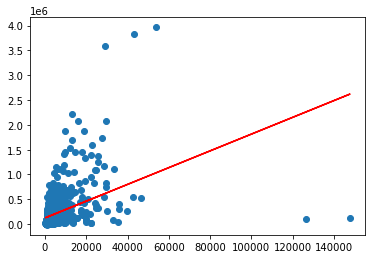

X: Followers
Score: 0.5121097779252909
Coef: [[0.30239245]]
Intercept [33138.48903457]


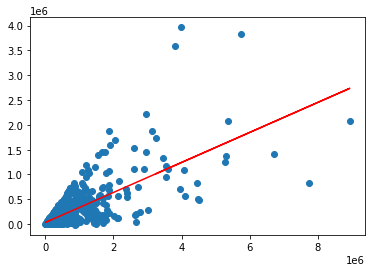

X: Views gained
Score: 0.05968095901465775
Coef: [[0.00333417]]
Intercept [166614.91325778]


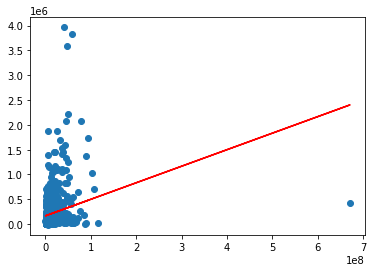

In [80]:
for data in variavel_preditora:
    X = df[data].values.reshape(-1, 1)
    y = df[variavel_alvo]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    print("X:",data)
    print("Score:",linear_regressor.score(X, y))
    print("Coef:",linear_regressor.coef_)
    print("Intercept",linear_regressor.intercept_)
    plt.scatter(X, y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

In [81]:
X = df[variavel_preditora]
y = df[variavel_alvo]

In [85]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [86]:
predictions = lm.predict(X)
predictions

array([[ 1.33253835e+06],
       [ 1.85281150e+06],
       [ 7.91896399e+05],
       [ 1.19374883e+06],
       [ 2.63200786e+06],
       [ 8.36625631e+05],
       [ 1.34413639e+06],
       [ 4.38967714e+05],
       [ 1.17456146e+06],
       [ 9.31603790e+05],
       [ 1.62513070e+06],
       [ 9.48036446e+05],
       [ 1.51234828e+06],
       [ 1.81377067e+06],
       [ 1.38278115e+06],
       [ 1.05222802e+06],
       [ 9.46147615e+05],
       [ 3.02800672e+05],
       [ 1.09269507e+06],
       [ 4.87586933e+05],
       [ 2.83507652e+05],
       [ 4.64242251e+05],
       [ 8.23186644e+05],
       [ 1.35380338e+06],
       [ 5.99822313e+05],
       [ 1.28826713e+06],
       [ 6.30854860e+05],
       [ 3.30449014e+05],
       [ 2.62954162e+05],
       [ 6.33116312e+05],
       [ 1.11745821e+05],
       [ 7.56481848e+05],
       [ 3.83512793e+05],
       [ 1.16590620e+06],
       [ 1.44778192e+05],
       [ 1.83887905e+06],
       [ 4.64404108e+05],
       [ 4.76604074e+05],
       [ 5.2

In [87]:
lm.score(X,y)

0.5398966236446627

# Regressão Linear - Streamers Brasileiros

- Qual a relação das outras variáveis com o ganho de seguidores do streamer no último ano?

In [97]:
df_br.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [98]:
variavel_preditora = ['Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers','Views gained']
variavel_alvo = ['Followers gained']

X: Watch time(Minutes)
Score: 0.41153510120354164
Coef: [[0.00022128]]
Intercept [147037.55936888]


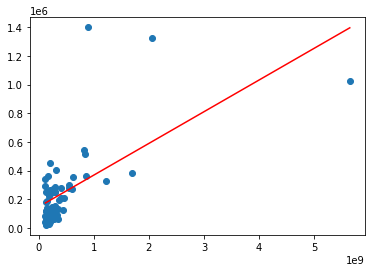

X: Stream time(minutes)
Score: 0.0063650651835472916
Coef: [[-0.16549749]]
Intercept [273396.41037331]


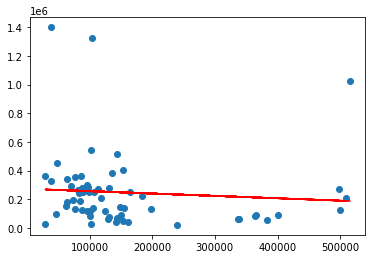

X: Peak viewers
Score: 0.33958208606401485
Coef: [[2.39643427]]
Intercept [154990.38317835]


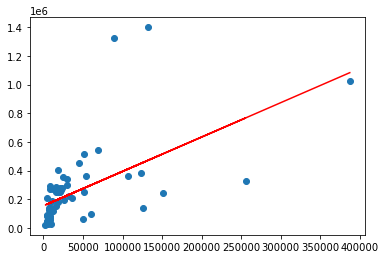

X: Average viewers
Score: 0.5665427614847385
Coef: [[39.51549092]]
Intercept [96969.7839685]


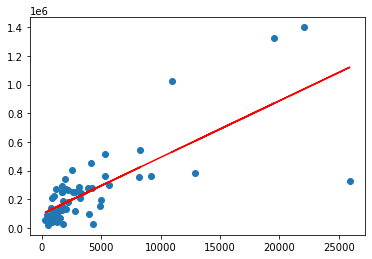

X: Followers
Score: 0.6953529025425662
Coef: [[0.38318874]]
Intercept [34163.11738601]


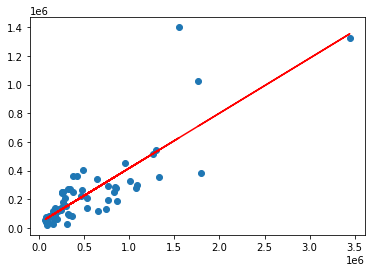

X: Views gained
Score: 0.37125336853759494
Coef: [[0.01092796]]
Intercept [128393.04763489]


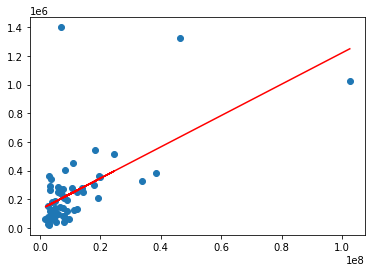

In [99]:
for data in variavel_preditora:
    X = df_br[data].values.reshape(-1, 1)
    y = df_br[variavel_alvo]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    print("X:",data)
    print("Score:",linear_regressor.score(X, y))
    print("Coef:",linear_regressor.coef_)
    print("Intercept",linear_regressor.intercept_)
    plt.scatter(X, y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

In [100]:
X = df_br[variavel_preditora]
y = df_br[variavel_alvo]

In [101]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [102]:
predictions = lm.predict(X)
predictions

array([[ 971233.57367107],
       [1259274.62467113],
       [ 692666.59138802],
       [ 573045.16106314],
       [1031060.61340669],
       [ 259684.73132308],
       [ 380322.58196261],
       [ 540913.24930153],
       [ 413159.30811053],
       [ 296255.07813421],
       [ 388971.26621894],
       [ 329677.40961913],
       [  -4535.19626885],
       [ 122409.59035845],
       [ 317705.76165238],
       [ 266461.48824956],
       [ 318580.01286978],
       [ 176224.42205346],
       [ 221767.40956875],
       [ 227617.22127425],
       [ 196282.99341642],
       [ 359113.80215446],
       [ 234920.43074391],
       [ 154645.01177276],
       [ 236595.44124548],
       [ 226568.73424364],
       [ 105135.33058686],
       [ 204614.27620074],
       [ 127597.46710864],
       [ 154067.21171458],
       [ 201531.31406083],
       [ 105126.51600555],
       [  16531.76718294],
       [  52289.01889976],
       [ 238582.63597084],
       [  16259.56020166],
       [ 251196.76170955],
 

In [103]:
lm.score(X,y)

0.8158534259955441